## Dataset

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [3]:
print("nums of train:", len(train_data))
print("nums of test:", len(test_data))

nums of train: 60000
nums of test: 10000


In [4]:
image, label = train_data[0]
print("Shape of img:", image.shape)  # örn: torch.Size([1, 32, 32])
print("Label:", label)
print("Type:", type(image))

Shape of img: torch.Size([1, 32, 32])
Label: 5
Type: <class 'torch.Tensor'>


In [5]:
image

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

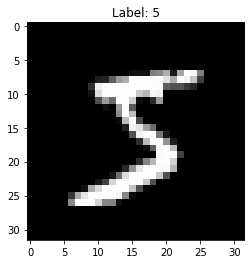

In [6]:
import matplotlib.pyplot as plt

image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.show()

## Model (LeNet-5)

In [7]:
# Reference: https://github.com/activatedgeek/LeNet-5
import torch.nn as nn
from collections import OrderedDict
import torch.nn as nn

class C1(nn.Module):
    def __init__(self):
        super(C1, self).__init__()

        self.c1 = nn.Sequential(OrderedDict([
            ('c1', nn.Conv2d(1, 6, kernel_size=(5, 5))),
            ('relu1', nn.ReLU()),
            ('s1', nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        ]))

    def forward(self, img):
        output = self.c1(img)
        return output


class C2(nn.Module):
    def __init__(self):
        super(C2, self).__init__()

        self.c2 = nn.Sequential(OrderedDict([
            ('c2', nn.Conv2d(6, 16, kernel_size=(5, 5))),
            ('relu2', nn.ReLU()),
            ('s2', nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        ]))

    def forward(self, img):
        output = self.c2(img)
        return output


class C3(nn.Module):
    def __init__(self):
        super(C3, self).__init__()

        self.c3 = nn.Sequential(OrderedDict([
            ('c3', nn.Conv2d(16, 120, kernel_size=(5, 5))),
            ('relu3', nn.ReLU())
        ]))

    def forward(self, img):
        output = self.c3(img)
        return output


class F4(nn.Module):
    def __init__(self):
        super(F4, self).__init__()

        self.f4 = nn.Sequential(OrderedDict([
            ('f4', nn.Linear(120, 84)),
            ('relu4', nn.ReLU())
        ]))

    def forward(self, img):
        output = self.f4(img)
        return output


class F5(nn.Module):
    def __init__(self):
        super(F5, self).__init__()

        self.f5 = nn.Sequential(OrderedDict([
            ('f5', nn.Linear(84, 10)),
            ('sig5', nn.LogSoftmax(dim=-1))
        ]))

    def forward(self, img):
        output = self.f5(img)
        return output


class LeNet5(nn.Module):
    """
    Input - 1x32x32
    Output - 10
    """
    def __init__(self):
        super(LeNet5, self).__init__()

        self.c1 = C1()
        self.c2_1 = C2() 
        self.c2_2 = C2() 
        self.c3 = C3() 
        self.f4 = F4() 
        self.f5 = F5() 

    def forward(self, img):
        output = self.c1(img)

        x = self.c2_1(output)
        output = self.c2_2(output)

        output += x

        output = self.c3(output)
        output = output.view(img.size(0), -1)
        output = self.f4(output)
        output = self.f5(output)
        return output

## Model Train on Train Dataset

In [8]:
import torch
import torch.optim as optim
model = LeNet5()

In [9]:
for name, param in model.named_parameters():
    print(f"Parametre adı: {name}")
    print(f"Şekli: {param.shape}")
    print(f"Değerler:\n{param}")
    print("-----------")

Parametre adı: c1.c1.c1.weight
Şekli: torch.Size([6, 1, 5, 5])
Değerler:
Parameter containing:
tensor([[[[ 0.0748,  0.0581,  0.0975, -0.0103,  0.0997],
          [ 0.1778,  0.1551, -0.1442, -0.1366,  0.1842],
          [-0.1039,  0.1976,  0.0751, -0.0848,  0.1734],
          [-0.0918,  0.0271,  0.1288, -0.0724,  0.1237],
          [ 0.1763, -0.0684, -0.1266, -0.0225, -0.0690]]],


        [[[-0.1791, -0.0787,  0.0543, -0.1546, -0.1403],
          [ 0.0315, -0.0062,  0.1747, -0.1276, -0.1035],
          [ 0.0245, -0.0557, -0.1542, -0.1563,  0.1792],
          [-0.0270, -0.0813,  0.0989,  0.0281, -0.1538],
          [-0.0432,  0.1192,  0.1691,  0.0937,  0.1935]]],


        [[[ 0.1540, -0.0603, -0.1167,  0.1002, -0.1029],
          [-0.1143, -0.1584, -0.0458, -0.1198,  0.0581],
          [ 0.1116, -0.0246, -0.0035, -0.0990, -0.0615],
          [-0.1616,  0.1174,  0.1090, -0.1184,  0.1974],
          [ 0.0401, -0.1032, -0.0476,  0.0899,  0.1924]]],


        [[[ 0.1993, -0.0890, -0.0872, 

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
for epoch in range(2): 
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1, Loss: 0.1705
Epoch 2, Loss: 0.0888


## Model Test on Test Dataset

In [11]:
model.eval()

correct = 0
total = 0

with torch.no_grad():  
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 97.70%


In [12]:
correct

9770